In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.options.display.float_format = '{:.2f}'.format

### Columns : 
<pre>
Country
Age
Gender
Income
Customer_Segment
Year
Month
Total_Purchases
Amount
Total_Amount
Product_Category
Product_Brand
Product_Type
Feedback
Payment_Method
Order_Status
Ratings	products
</pre>

In [123]:
# Get the data
df = pd.read_csv("new_retail_data.csv")

In [124]:
# Clean the data by dropping rows with missing values and columns that are not essential.
df = df.dropna()
df = df.drop(columns=["Name", "Email", "Customer_ID", "Transaction_ID", "Address", "Phone", "Date", "Time", "Zipcode", "State", "City", "Shipping_Method", "Order_Status", "Feedback", "Ratings", "products"])

In [125]:
# Grab Male Customers and Female Customers for Analysis
customers_male = df[df['Gender'] == 'Male']
customers_female = df[df['Gender'] == 'Female']

In [120]:
df.head()

,Country,Age,Gender,Income,Customer_Segment,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Payment_Method
0,Germany,21.00,Male,Low,Regular,2023.00,September,3.00,108.03,324.09,Clothing,Nike,Shorts,Debit Card
1,UK,19.00,Female,Low,Premium,2023.00,December,2.00,403.35,806.71,Electronics,Samsung,Tablet,Credit Card
2,Australia,48.00,Male,Low,Regular,2023.00,April,3.00,354.48,1063.43,Books,Penguin Books,Children's,Credit Card
3,Canada,56.00,Male,High,Premium,2023.00,May,7.00,352.41,2466.85,Home Decor,Home Depot,Tools,PayPal
4,UK,22.00,Male,Low,Premium,2024.00,January,2.00,124.28,248.55,Grocery,Nestle,Chocolate,Cash


In [93]:
df.sort_values(by="Total_Amount", ascending=False).head(10)

,Country,Age,Gender,Income,Customer_Segment,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Payment_Method
10148,UK,19.00,Female,Medium,Regular,2023.00,June,10.00,499.96,4999.63,Electronics,Samsung,Television,PayPal
164294,USA,23.00,Female,Medium,New,2023.00,August,10.00,499.93,4999.34,Clothing,Adidas,Jacket,Cash
97636,Canada,46.00,Male,Low,Premium,2023.00,November,10.00,499.92,4999.17,Grocery,Coca-Cola,Juice,Credit Card
146622,USA,26.00,Male,High,Regular,2023.00,January,10.00,499.87,4998.72,Books,Penguin Books,Non-Fiction,Credit Card
261368,Germany,34.00,Male,Medium,Regular,2023.00,July,10.00,499.86,4998.60,Clothing,Zara,Shirt,Cash
57897,USA,20.00,Male,High,New,2023.00,November,10.00,499.85,4998.47,Books,HarperCollins,Fiction,Cash
288399,Germany,27.00,Female,Medium,Premium,2023.00,June,10.00,499.83,4998.31,Electronics,Samsung,Television,Debit Card
269425,Germany,22.00,Female,Medium,Premium,2024.00,April,10.00,499.82,4998.20,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Cash
221400,UK,69.00,Female,Medium,New,2023.00,August,10.00,499.80,4997.99,Books,HarperCollins,Fiction,Credit Card
285886,UK,43.00,Female,Medium,Regular,2023.00,April,10.00,499.79,4997.93,Electronics,Apple,Smartphone,Debit Card


# Customer Level -----------------------------------------------------------------

## Which gender dominates the different income categories

In [7]:
# Grab count of each income category of Male customers; divide by total to get percentage
income_counts_male = customers_male['Income'].value_counts()
income_counts_male = income_counts_male / income_counts_male.sum()

In [8]:
# Grab count of each income category of Female customers; divide by total to get percentage
income_counts_female = customers_female['Income'].value_counts()
income_counts_female = income_counts_female / income_counts_female.sum()

In [9]:
difference = income_counts_male - income_counts_female
for category in difference:
    if category > 0:
        print(f"Predominantly Male by {category:.5f}%")
    else:
        print(f"Predominantly Female by {category:.5f}%")

# CONCLUSION: Male are predominantly in the higher income categories. Female are predominantly in the lower income categories.
# Visualization found in next script.


Predominantly Female by -0.01691%
Predominantly Female by -0.00544%
Predominantly Male by 0.02235%


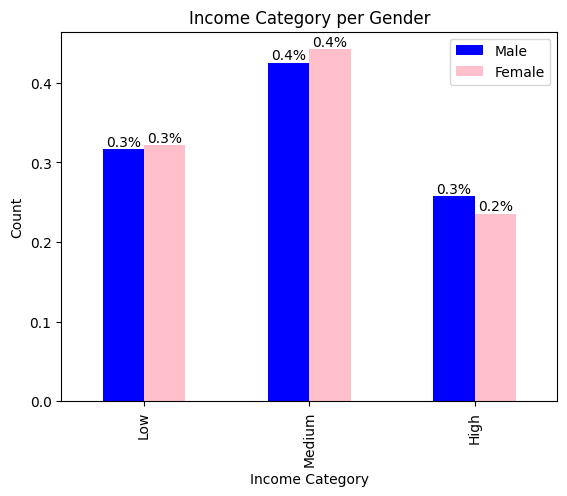

        Male  Female
Income              
Low     0.32    0.32
Medium  0.43    0.44
High    0.26    0.24


In [10]:
# Combine male and female counts into a DataFrame for side by side comparison
comparison = pd.DataFrame({
    'Male': income_counts_male.reindex(['Low', 'Medium', 'High']),
    'Female': income_counts_female.reindex(['Low', 'Medium', 'High'])
})
ax = comparison.plot(kind='bar', color=['blue', 'pink'], title='Income Category per Gender')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()
print(comparison)

## Age Distribution

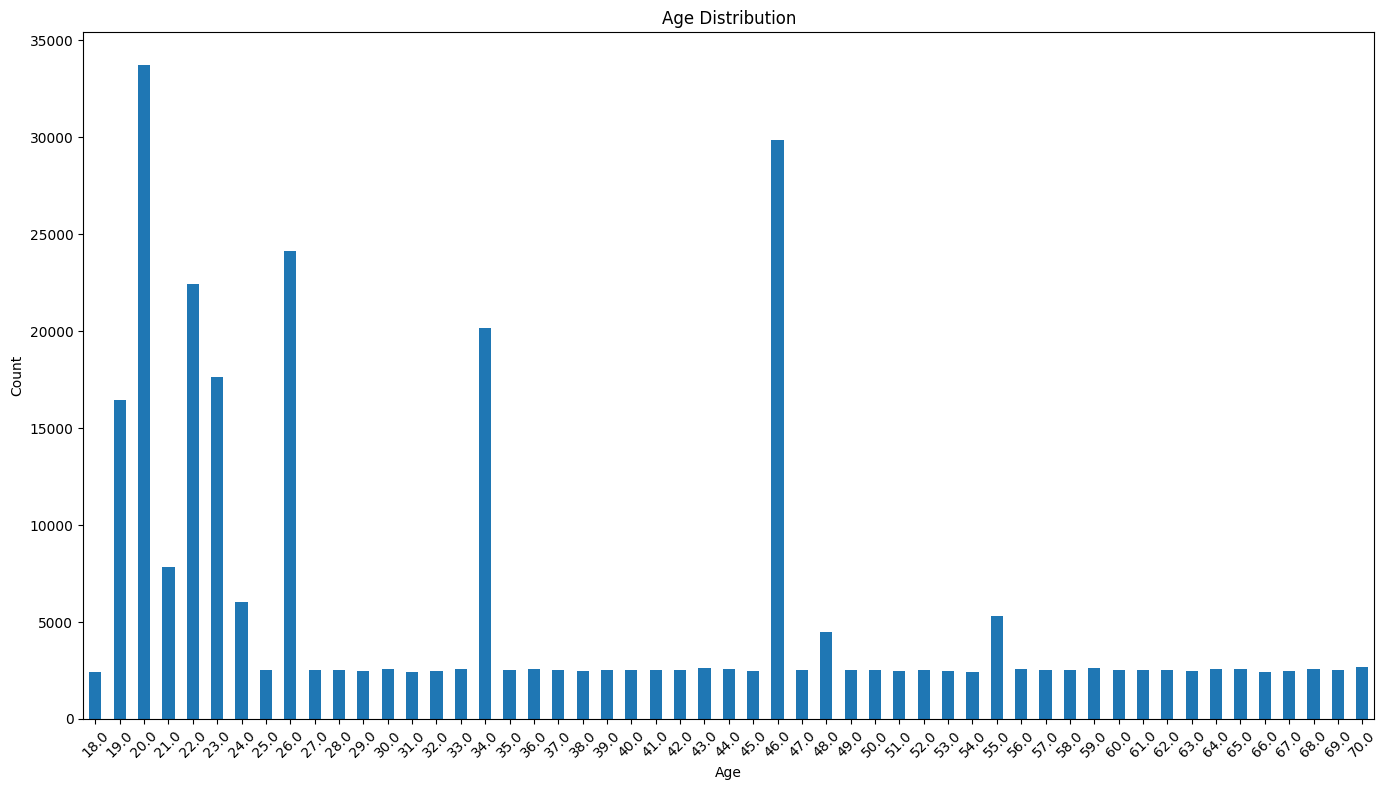

In [11]:
age_distribution = df['Age'].value_counts()
age_distribution = age_distribution.sort_index()
plt.figure(figsize=(14, 8))
age_distribution.plot(kind='bar', title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Age Average

In [12]:
age_average = df['Age'].mean()
age_average

35.46576684778726

## Consumption by Gender

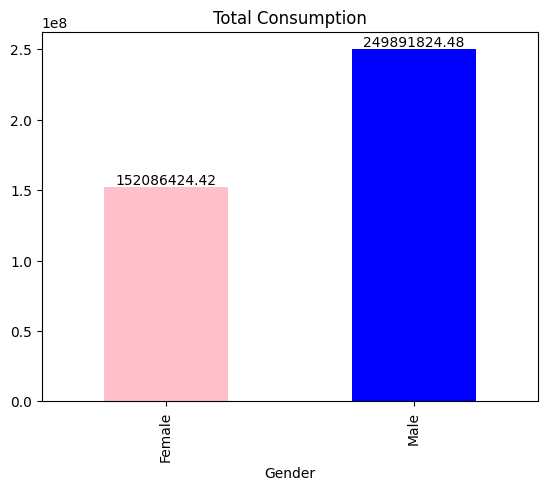

In [13]:
consumption_by_gender = df.groupby('Gender')['Total_Amount'].sum()
one_c = consumption_by_gender.plot(kind='bar', color=['pink', 'blue'], title='Total Consumption')
for container in one_c.containers:
    one_c.bar_label(container, fmt='%.2f')
plt.show()

## Consumption by Gender Average

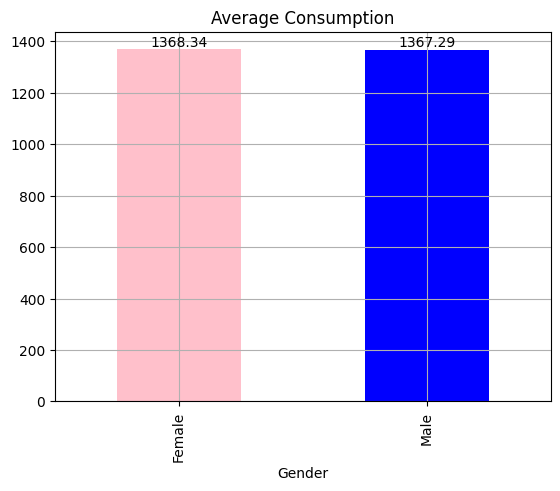

In [14]:
consumption_by_gender_avg = df.groupby('Gender')['Total_Amount'].mean()
one_d = consumption_by_gender_avg.plot(kind='bar', color=['pink', 'blue'], title='Average Consumption')
for container in one_d.containers:
    one_d.bar_label(container, fmt='%.2f')
plt.grid(True)
plt.show()


## Consumption by Income Group

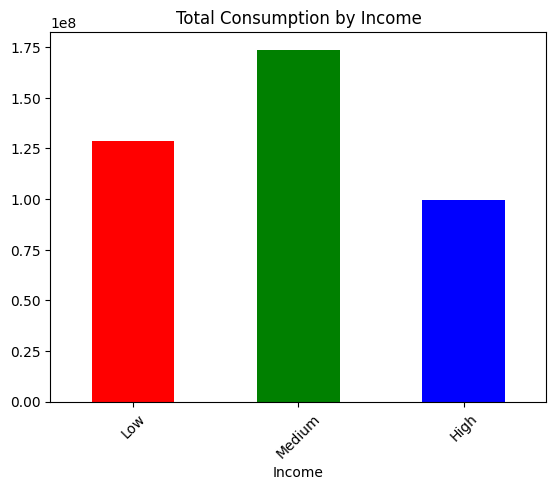

In [15]:
consumption_by_income = df.groupby('Income')['Total_Amount'].sum()
consumption_by_income = consumption_by_income.reindex(['Low', 'Medium', 'High'])
consumption_by_income.plot(kind='bar', color=['red', 'green', 'blue'], title='Total Consumption by Income')
plt.xticks(rotation=45)
plt.show()


## Consumption by Income Group Average

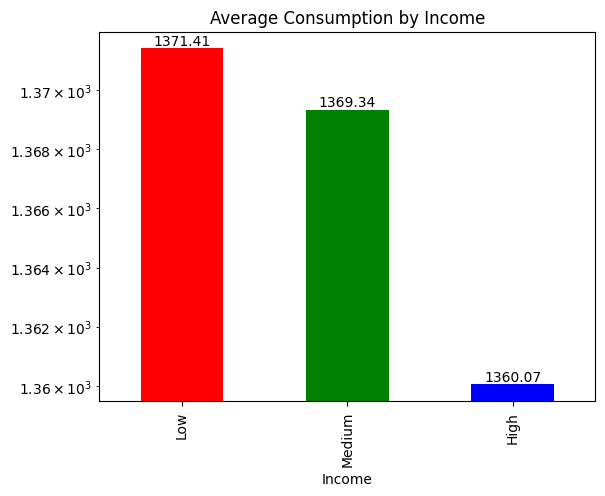

In [16]:
consumption_by_income_avg = df.groupby('Income')['Total_Amount'].mean()
consumption_by_income_avg = consumption_by_income_avg.reindex(['Low', 'Medium', 'High'])
one_g = consumption_by_income_avg.plot(kind='bar', color=['red', 'green', 'blue'], title='Average Consumption by Income')
for container in one_g.containers:
    one_g.bar_label(container, fmt='%.2f')
plt.yscale('log') # Values are very similar, so log scale is used to better visualize the differences.
plt.show()

## Consumption by Gender and Income

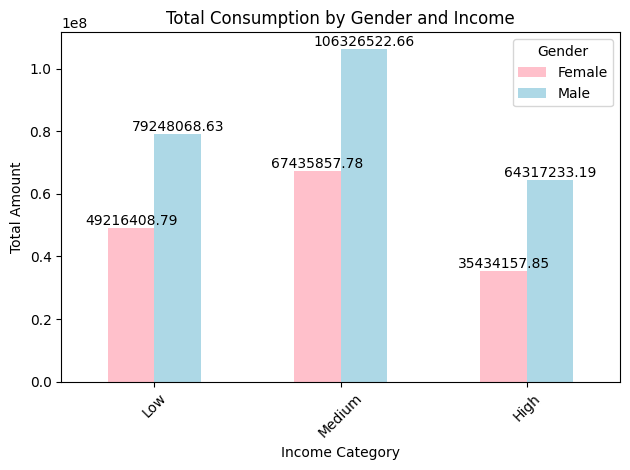

In [17]:
consumption_gender_income = df.groupby(['Gender', 'Income'])['Total_Amount'].sum()
plot_data = consumption_gender_income.unstack(level=0)
plot_data = plot_data.reindex(['Low', 'Medium', 'High'])
ax = plot_data.plot(kind='bar', color=['pink', 'lightblue'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title("Total Consumption by Gender and Income")
plt.xlabel("Income Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Consumption by Gender and Income Average

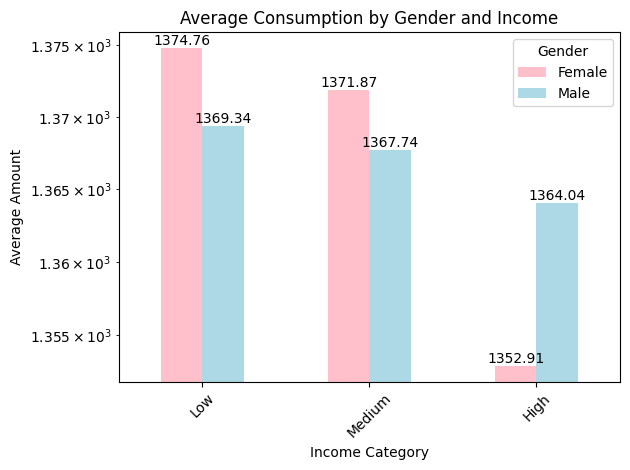

In [18]:
consumption_gender_income_avg = df.groupby(['Gender', 'Income'])['Total_Amount'].mean()
plot_data = consumption_gender_income_avg.unstack(level=0)
plot_data = plot_data.reindex(['Low', 'Medium', 'High'])
ax = plot_data.plot(kind='bar', color=['pink', 'lightblue'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title("Average Consumption by Gender and Income")
plt.yscale('log') # Readability is improved with log scale.
plt.xlabel("Income Category")
plt.ylabel("Average Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Country Level ---------------------------------------------------------------------------

## Which country consumes the most on average
Between Germany, UK, Australia, Canada, and USA

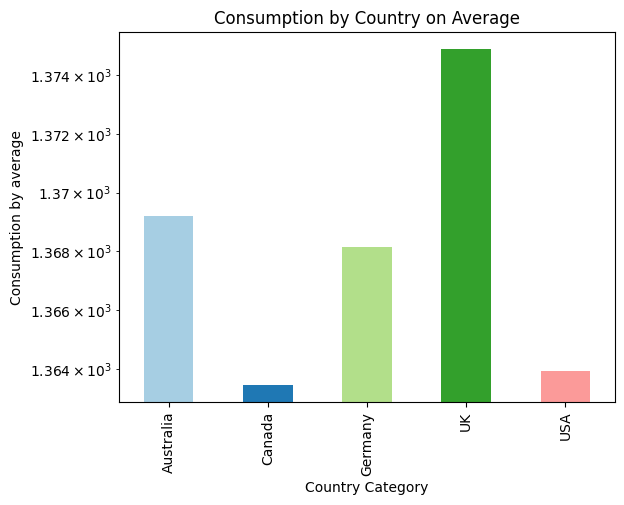

Country
Australia   1369.21
Canada      1363.45
Germany     1368.15
UK          1374.90
USA         1363.94
Name: Total_Amount, dtype: float64


In [19]:
country_consumption_avg = df.groupby('Country')['Total_Amount'].mean()
country_consumption_avg.plot(kind='bar', title='Consumption by Country on Average', color=plt.cm.Paired(range(len(country_consumption_avg))))
plt.xlabel('Country Category')
plt.ylabel('Consumption by average') 
plt.yscale('log') # Logarithmic scale to better visualize the differences since the values are very similar.
plt.show()

print(country_consumption_avg)

## Which country consumed the most.

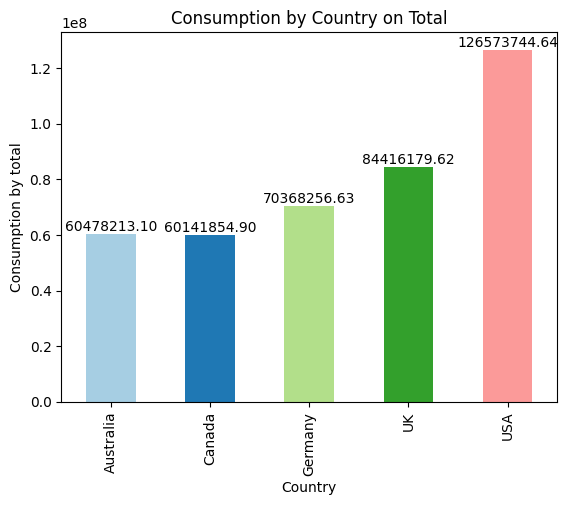

In [20]:
country_consumption_total = df.groupby('Country')['Total_Amount'].sum()
ax = country_consumption_total.plot(kind='bar', title='Consumption by Country on Total', color=plt.cm.Paired(range(len(country_consumption_total))))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.xlabel('Country')
plt.ylabel('Consumption by total')
plt.show()

# CONCLUSION: USA as a whole consumes more than UK. But UK has higher spenders.


## Greatest Consumer by Month in 2023 .  (Omit 2024 because it has substantially less inputs than 2023)

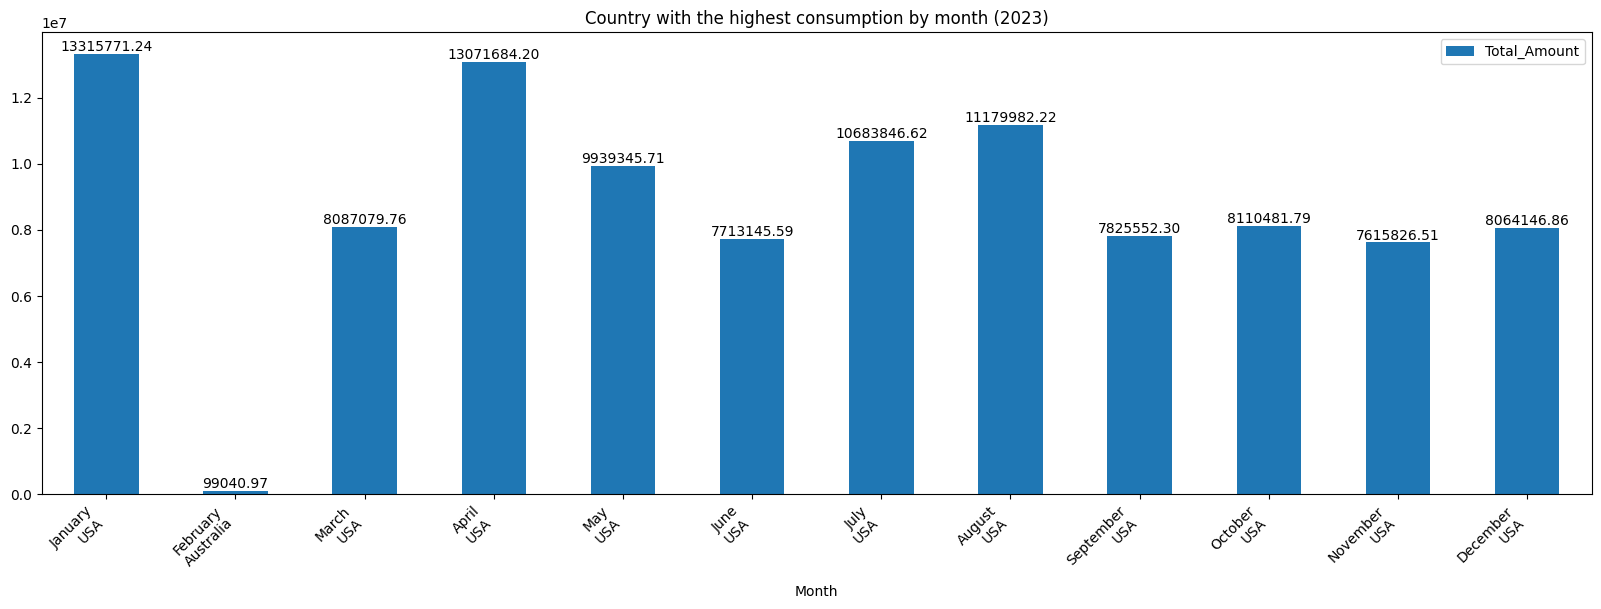

        Month    Country  Total_Amount
24    January        USA   13315771.24
15   February  Australia      99040.97
39      March        USA    8087079.76
4       April        USA   13071684.20
44        May        USA    9939345.71
34       June        USA    7713145.59
29       July        USA   10683846.62
9      August        USA   11179982.22
59  September        USA    7825552.30
54    October        USA    8110481.79
49   November        USA    7615826.51
14   December        USA    8064146.86


In [21]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
data2023 = df[df['Year'] == 2023]
monthly_consumption = data2023.groupby(['Month', 'Country'])['Total_Amount'].sum().reset_index()
max_consumers = monthly_consumption.loc[monthly_consumption.groupby('Month')['Total_Amount'].idxmax()]
max_consumers['Month'] = pd.Categorical(max_consumers['Month'], categories=month_order, ordered=True)
max_consumers = max_consumers.sort_values('Month')
ax = max_consumers.plot(kind='bar', x='Month', y='Total_Amount', title='Country with the highest consumption by month (2023)', figsize=(20, 6))
plt.xticks(range(len(max_consumers)), 
           [f"{row['Month']}\n{row['Country']}" for _, row in max_consumers.iterrows()], 
           rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()
plt.show()
print(max_consumers)

## Why February displays an extreme dip in consumption?

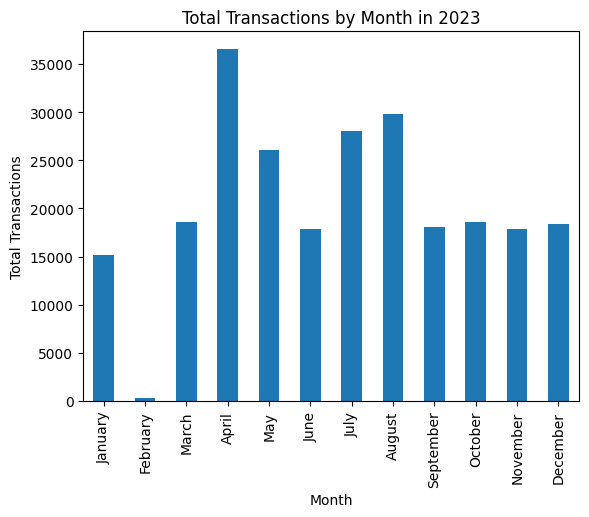

Month
January      15145
February       269
March        18600
April        36561
May          26078
June         17852
July         28074
August       29816
September    18121
October      18582
November     17871
December     18410
Name: Total_Amount, dtype: int64


In [22]:
monthly_count = df[df["Year"] == 2023].groupby("Month")["Total_Amount"].count()
monthly_count = monthly_count.reindex(month_order)
monthly_count.plot(kind='bar', title='Total Transactions by Month in 2023')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.show()
print(monthly_count)

# Product Level ------------------------------------------------------------------

## Product Category purchase distribution

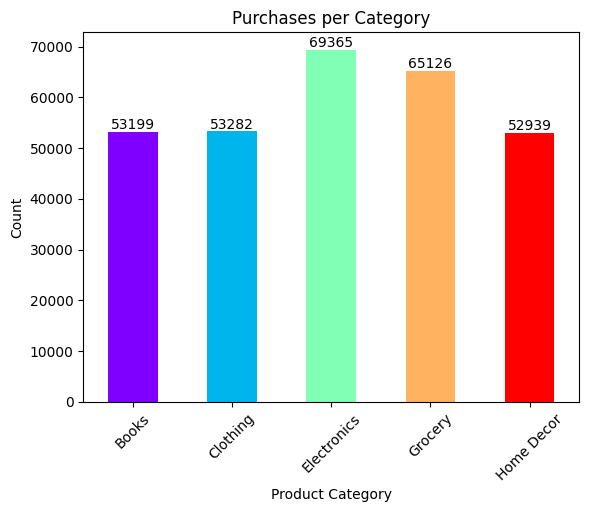

In [66]:
product_consumption = df.groupby('Product_Category').size()
ax = product_consumption.plot(kind='bar', title='Purchases per Category', color=plt.cm.rainbow(np.linspace(0, 1, len(product_consumption))))
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Gross Sales per Category

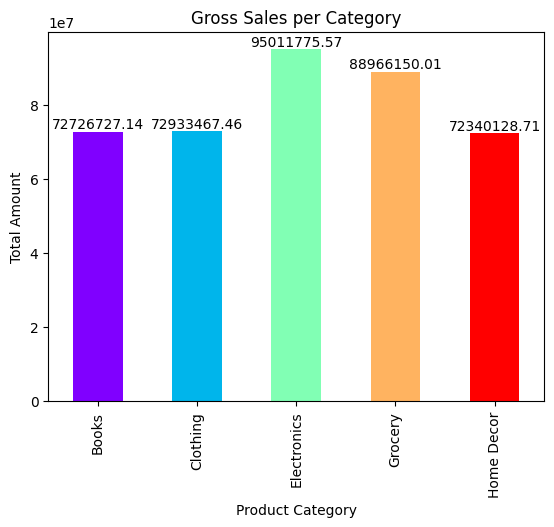

In [ ]:
product_category_gross_sales = df.groupby('Product_Category')['Total_Amount'].sum()
ax = product_category_gross_sales.plot(kind='bar', title='Gross Sales per Category', color=plt.cm.rainbow(np.linspace(0, 1, len(product_category_gross_sales))))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

## Category Purchase Count per Gender

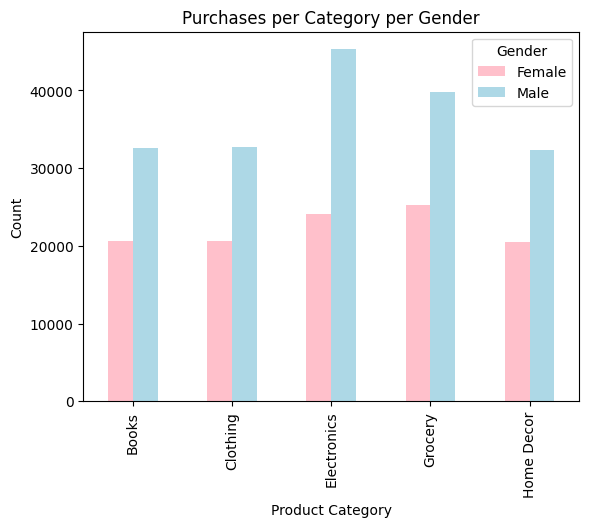

In [68]:
product_category_gender = df.groupby(['Product_Category', 'Gender']).size()
product_category_gender = product_category_gender.unstack(level=1)
product_category_gender.plot(kind='bar', title='Purchases per Category per Gender', color=['pink', 'lightblue'])
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

## Gross Sales per Brand

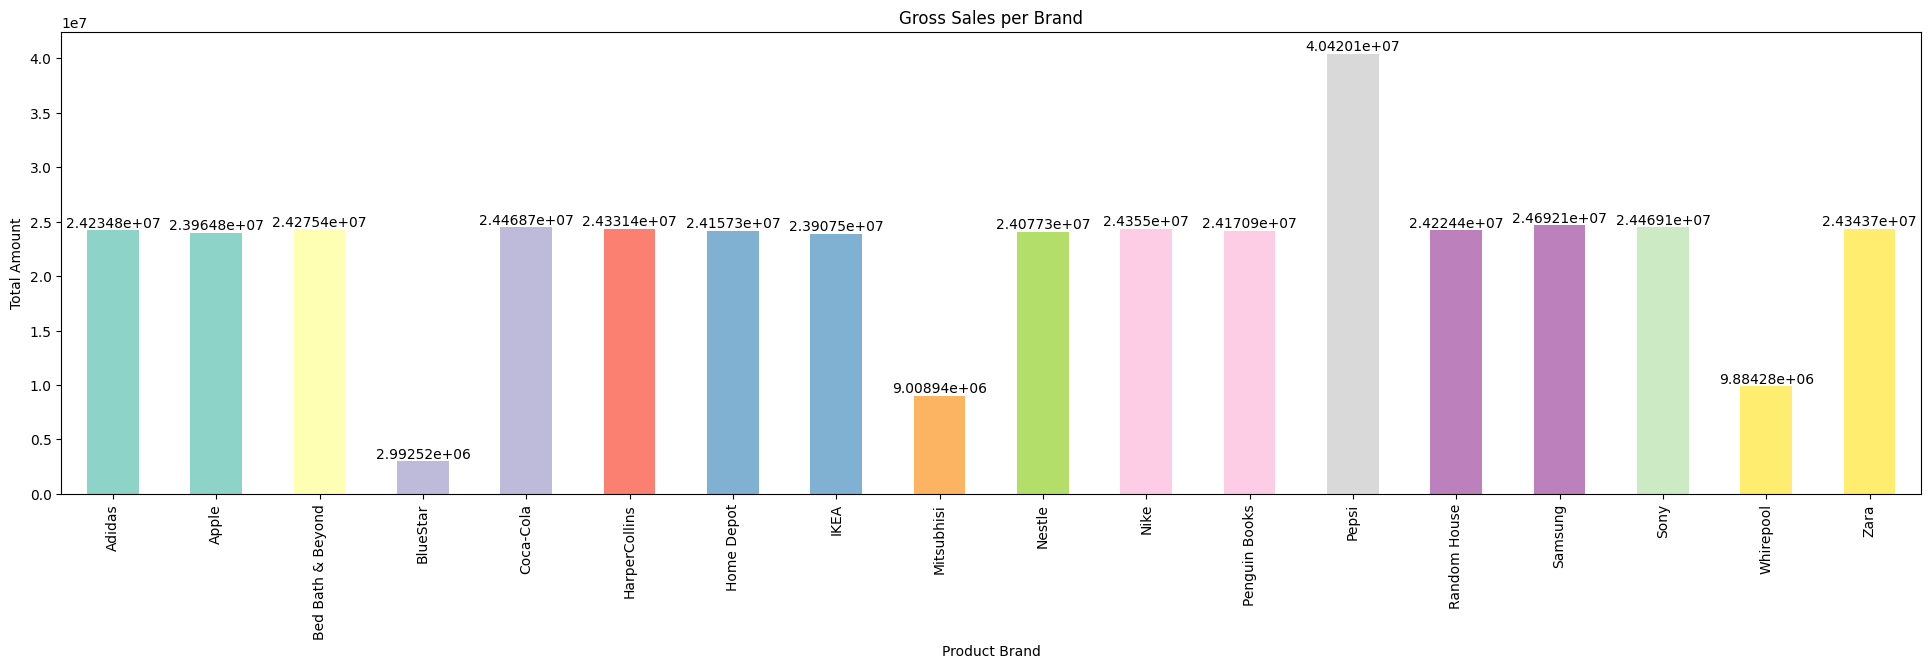

In [76]:
brand_gross_sales = df.groupby('Product_Brand')['Total_Amount'].sum()
ax = brand_gross_sales.plot(kind='bar', title='Gross Sales per Brand', color=plt.cm.Set3(np.linspace(0, 1, len(brand_gross_sales))), figsize=(24, 6))
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Product Brand')
plt.ylabel('Total Amount')
plt.show()


## Brand sales count by Gender

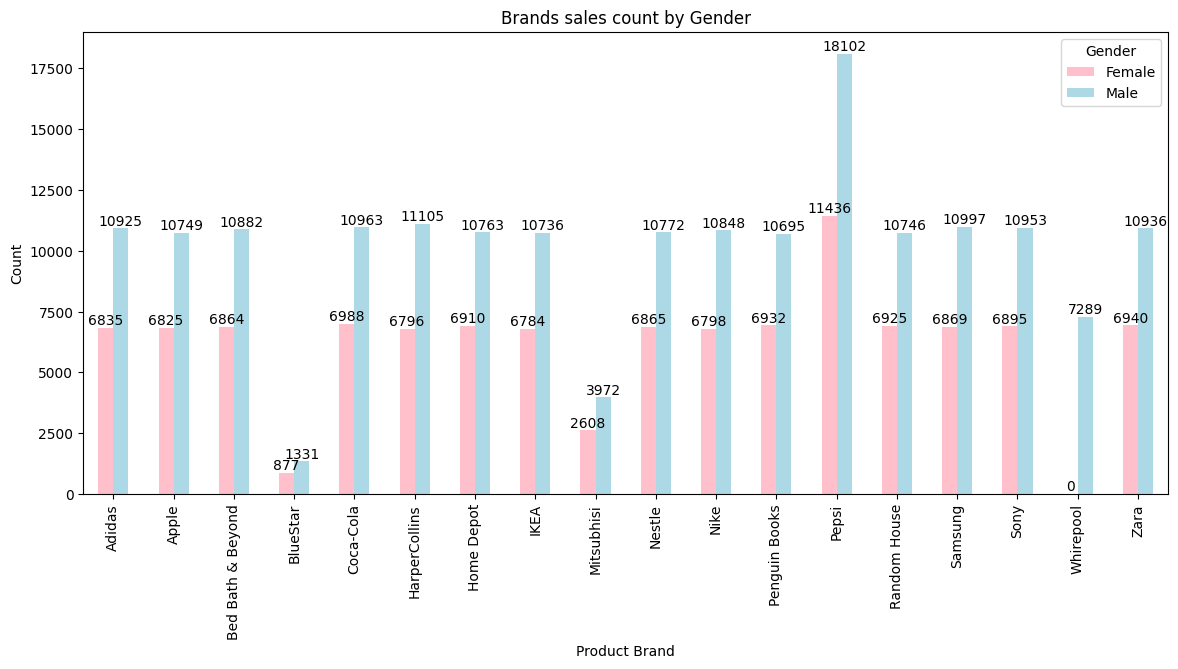

In [83]:
brands_by_gender = df.groupby(['Product_Brand', 'Gender']).size()
brands_by_gender = brands_by_gender.unstack(level=1)
ax = brands_by_gender.plot(kind='bar', title='Brands sales count by Gender', color=['pink', 'lightblue'], figsize=(14, 6))
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.show()

## Clientele Distribution by Gender

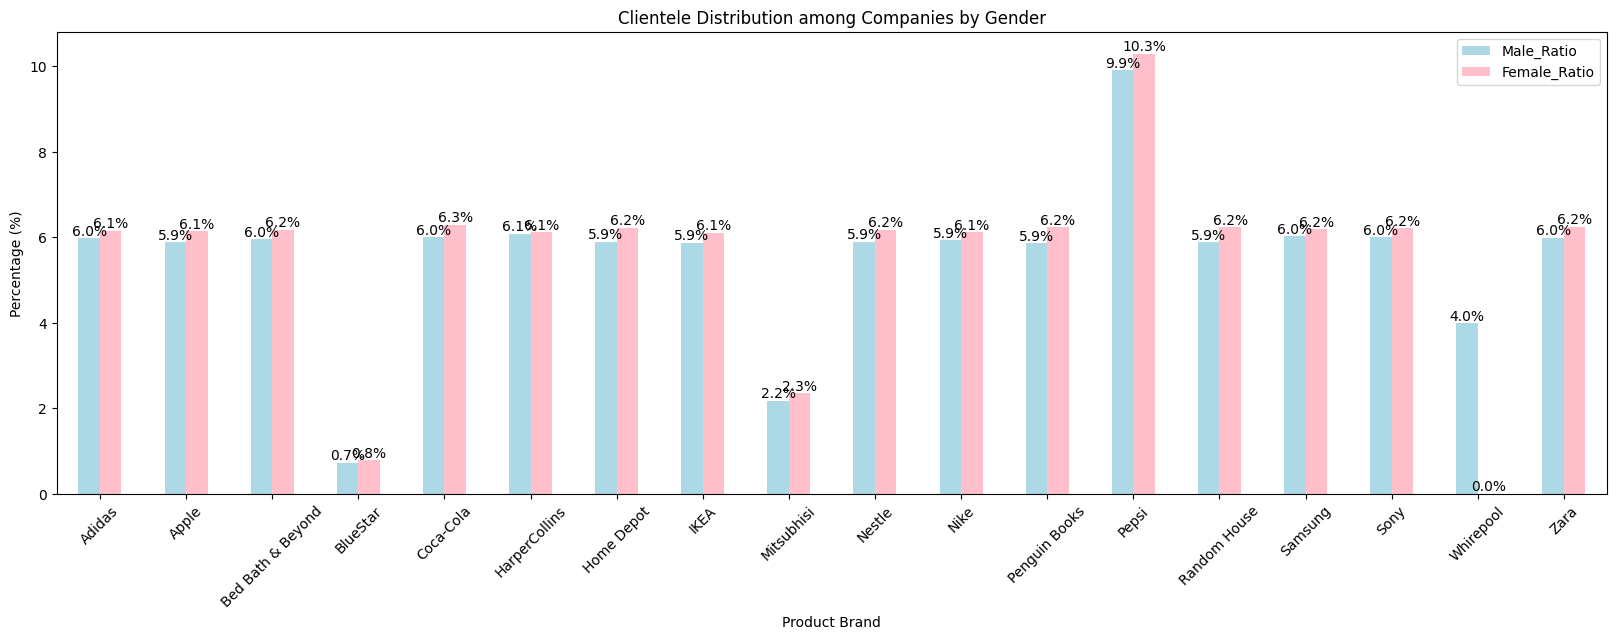

In [84]:
# Calculate total customers by gender
gender_totals = df.groupby('Gender').size()

# Calculate customers by brand and gender
brand_gender_counts = df.groupby(['Product_Brand', 'Gender']).size().unstack()

# Calculate ratio for males
male_ratios = brand_gender_counts['Male'] / gender_totals['Male'] * 100
female_ratios = brand_gender_counts['Female'] / gender_totals['Female'] * 100

gender_ratio = pd.DataFrame({
    'Male_Ratio' : male_ratios,
    'Female_Ratio' : female_ratios,
})

ax = gender_ratio.plot(kind='bar', title="Clientele Distribution among Companies by Gender", color=['lightblue', 'pink'], figsize=(20, 6))
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.xlabel('Product Brand')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

## Gender Distribution by Brand

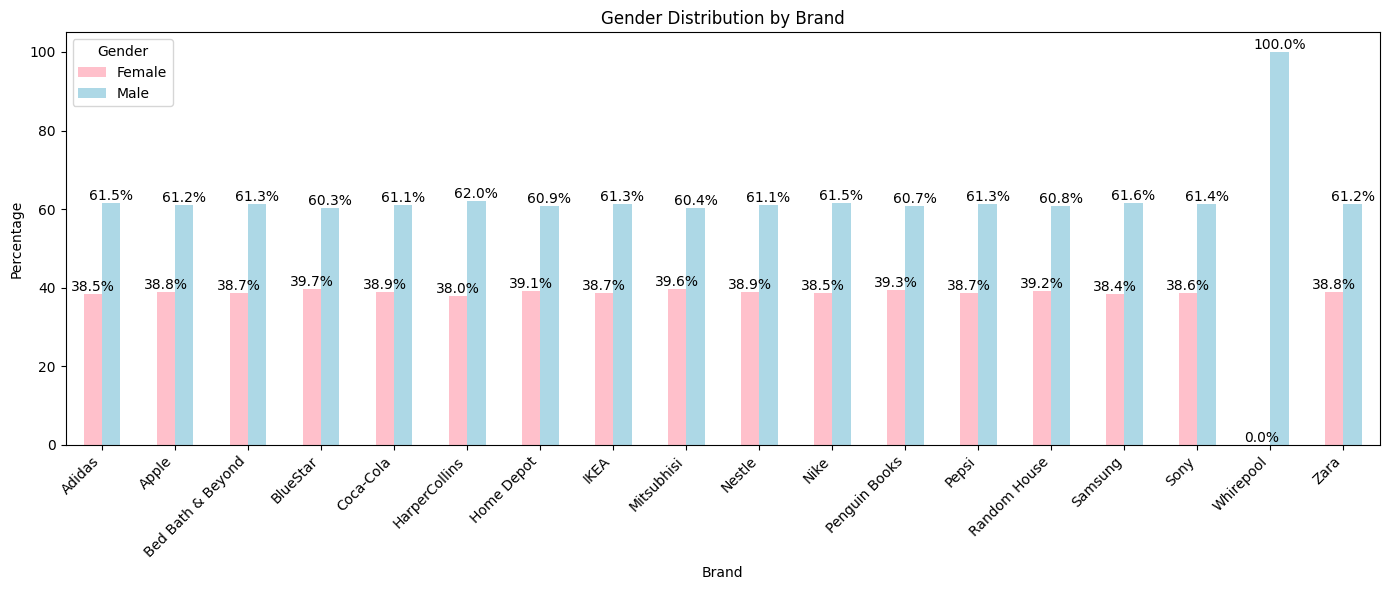

In [81]:
brand_gender = df.groupby(['Product_Brand', 'Gender']).size().unstack()
ratios = brand_gender.div(brand_gender.sum(axis=1), axis=0) * 100

ax = ratios.plot(kind='bar', title="Gender Ratio by Brand", color=['pink', 'lightblue'], figsize=(14, 6))
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.xlabel('Brand')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Predictions and Inferences ---------------------------------------------------

In [183]:
from torch import nn

class MLP(nn.Module):
    # Input dimensions : The number of features the data input will have.
    # num_classes : The number of possible classes a target may have.
    def __init__(self, input_dim, num_classes):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
            )
    
    def forward(self, x):
        return self.model(x)

In [147]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
def create_datasets(features, target, batch_size=64):
    dataset = TensorDataset(features, target)

    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size

    # Split the dataset
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader

In [110]:
from torchmetrics import Accuracy
from torch.nn import functional as F

def evaluate_model(model, data_loader):
    model.eval()
    accuracy_metric = Accuracy(task='multiclass', num_classes=3)
    test_loss = 0

    with torch.no_grad():
        for batch_features, batch_target in data_loader:
            outputs = model(batch_features)
            loss = F.cross_entropy(outputs, batch_target)
            test_loss += loss.item()
            accuracy_metric.update(outputs, batch_target)

    avg_loss = test_loss / len(data_loader)
    avg_acc = accuracy_metric.compute().item()

    return avg_loss, avg_acc

def train_model(model, optimizer, train_loader, val_loader, epochs):
    accuracy_metric = Accuracy(task='multiclass', num_classes=3)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, epochs=epochs, steps_per_epoch=len(train_loader))
    history = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        accuracy_metric.reset()

        for batch_features, batch_target in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = F.cross_entropy(outputs, batch_target)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            accuracy_metric.update(outputs, batch_target)

        train_accuracy = accuracy_metric.compute().item()
        val_loss, val_accuracy = evaluate_model(model, val_loader)

        scheduler.step(val_loss)

        history.append({
            'epoch': epoch + 1,
            'train_loss': epoch_loss / len(train_loader),
            'train_accuracy': train_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        })

        print(f"Epoch {epoch + 1}: Train Loss: {epoch_loss / len(train_loader):.4f}, "
              f"Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")


    return pd.DataFrame(history)

In [179]:
ml_df = df.copy()
ml_df.drop(columns=['Country', 'Product_Category', 'Product_Brand', "Product_Type", "Year", "Month"], inplace=True)


In [171]:
ml_df.head()

,Age,Gender,Income,Customer_Segment,Total_Purchases,Amount,Total_Amount,Payment_Method
0,21.00,Male,Low,Regular,3.00,108.03,324.09,Debit Card
1,19.00,Female,Low,Premium,2.00,403.35,806.71,Credit Card
2,48.00,Male,Low,Regular,3.00,354.48,1063.43,Credit Card
3,56.00,Male,High,Premium,7.00,352.41,2466.85,PayPal
4,22.00,Male,Low,Premium,2.00,124.28,248.55,Cash


In [180]:
# Map from string to integer
income_category_mapping = {"Low": 0, "Medium": 1, "High": 2}
ml_df["Income"] = ml_df["Income"].map(income_category_mapping)

gender_mapping = {"Male": 0, "Female": 1}
ml_df["Gender"] = ml_df["Gender"].map(gender_mapping)

customer_segment_mapping = {"New": 0, "Regular": 1, "Premium": 2}
ml_df["Customer_Segment"] = ml_df["Customer_Segment"].map(customer_segment_mapping)

payment_method_mapping = {"Credit Card": 0, "Debit Card": 1, "Paypal": 2, "Cash": 3}
ml_df["Payment_Method"] = ml_df["Payment_Method"].map(payment_method_mapping)


# Build Features and Target
features = ml_df[["Age", "Gender", "Customer_Segment", "Total_Purchases", "Amount", "Total_Amount", "Payment_Method"]].values
target = ml_df["Income"].values

In [181]:
features = torch.tensor(features, dtype=torch.float32)
target = torch.tensor(target, dtype=torch.long)

In [184]:
train_loader, val_loader = create_datasets(features, target)
input_dim = features.shape[1]
model = MLP(input_dim, 3)
